In [1]:
#Importing related dependencies;
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Reading dataset;
df = pd.read_csv('dataset/happiness_score_2019.csv')

In [3]:
#Checking dataset;
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [4]:
#Number of rows and cols in dataset;
df.shape

(156, 9)

In [5]:
#Info about dataset;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
#Checking nnull values;
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
#Removing spaces in str_columns;
df.columns = df.columns.str.replace(' ', '_')
#Removing irrelevant columns from the dataset;
df = df.drop(columns=['Overall_rank'])

In [8]:
#Sorting the list according to happiness score and choosing the top 30 and last 30 countries;
df1 = df.sort_values(by=['Score'], ascending=False).head(30)
df2 = df.sort_values(by=['Score'], ascending=True).head(30)

<Axes: xlabel='Country_or_region'>

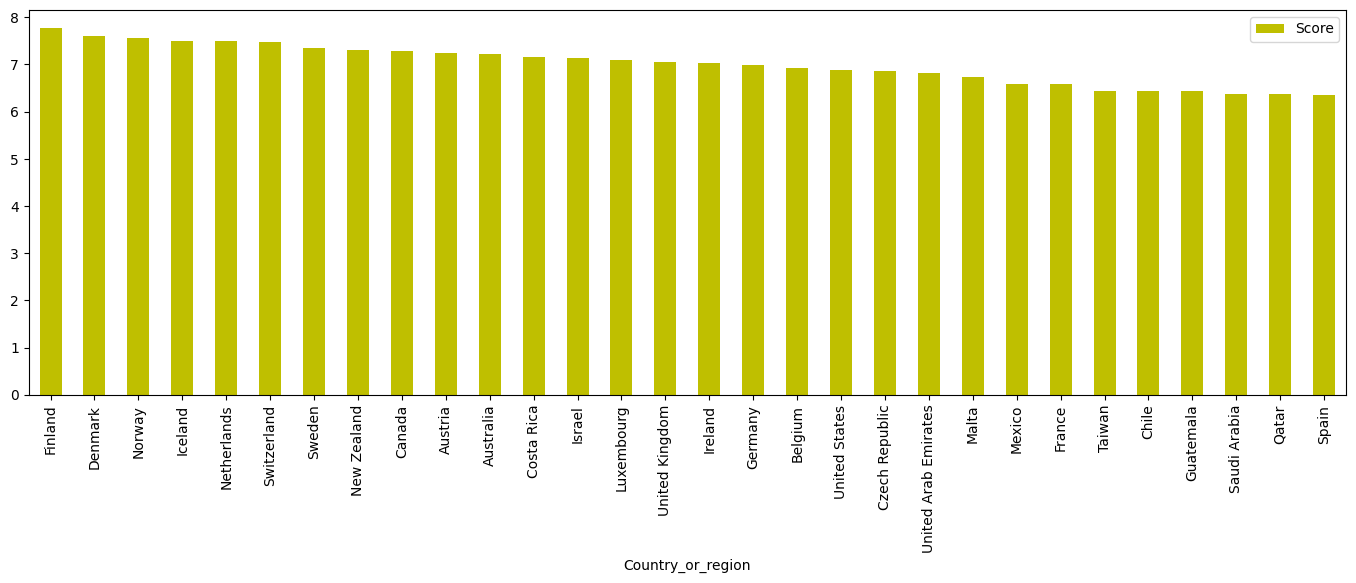

In [9]:
#30 countries with the highest happiness score;
df1.plot(kind='bar', x = 'Country_or_region', y='Score', figsize= [17,5], color='y')

<Axes: xlabel='Country_or_region'>

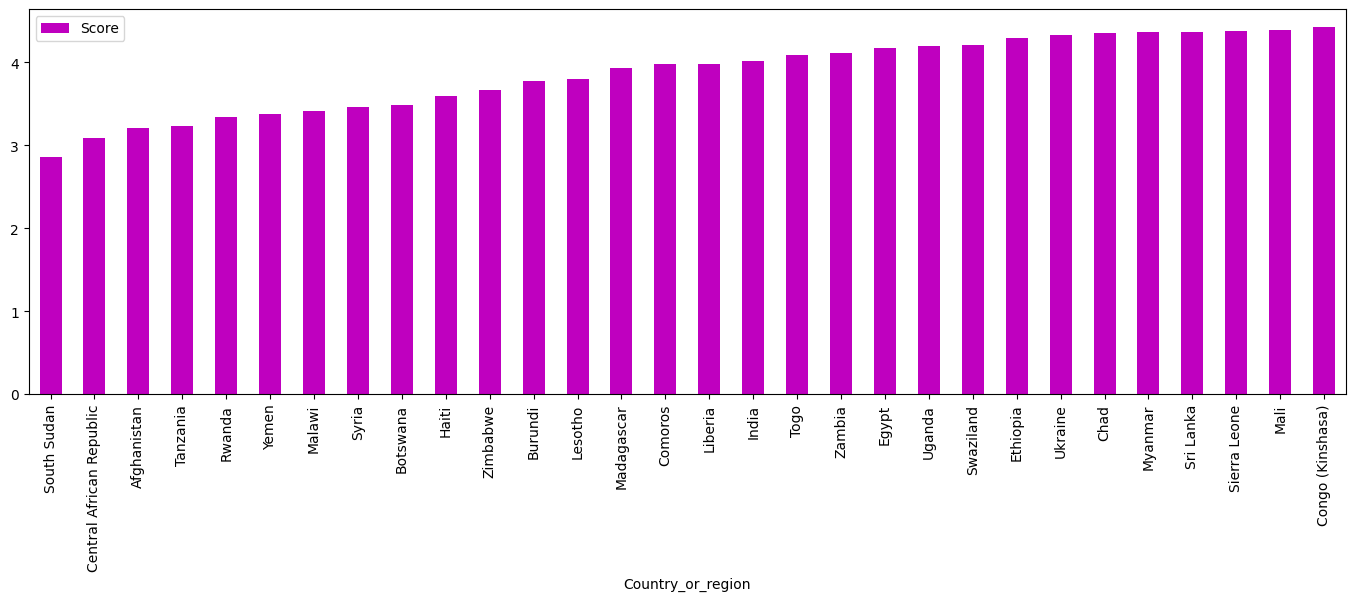

In [10]:
#30 countries with the lowest happiness score;
df2.plot(kind='bar', x = 'Country_or_region', y='Score', figsize= [17,5], color='m')

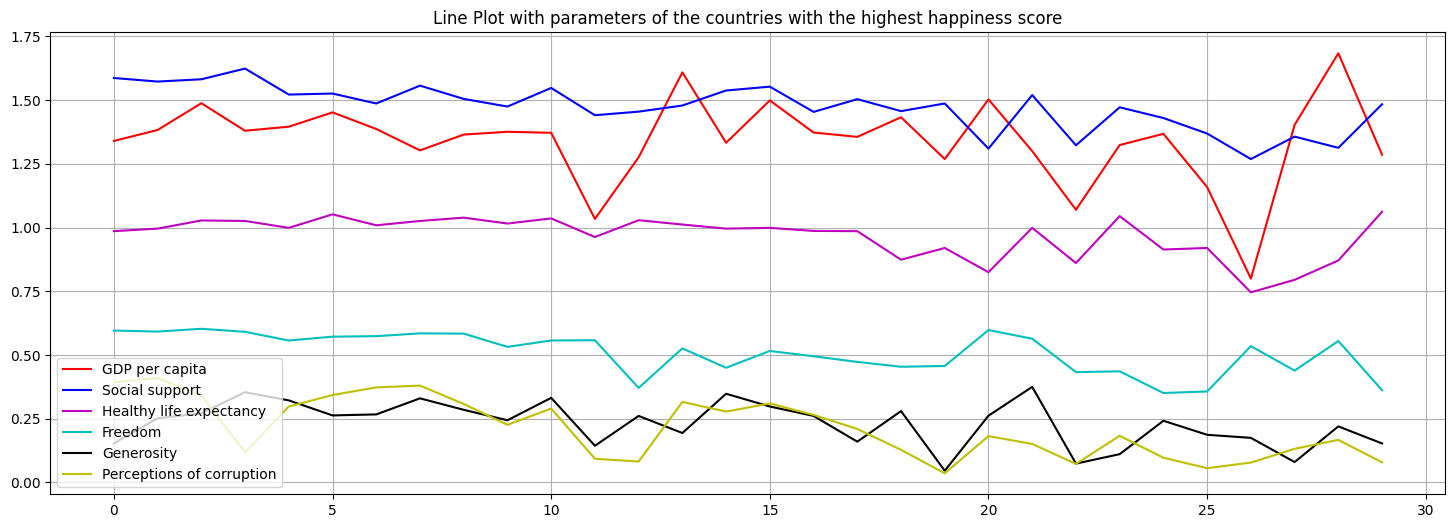

In [11]:
#The relationship between the other parameters of the countries with the highest happiness score;
df1.GDP_per_capita.plot(kind = "line",color = "r",label = "GDP per capita",grid = True,figsize = (18,6))
df1.Social_support.plot(kind = "line",color = "b",label = "Social support",grid = True,figsize = (18,6))
df1.Healthy_life_expectancy.plot(kind = "line",color = "m",label = "Healthy life expectancy",
                                 grid = True,figsize = (18,6))
df1.Freedom_to_make_life_choices.plot(kind = "line",color = "c",label = "Freedom",grid = True,figsize = (18,6))
df1.Generosity.plot(kind = "line",color = "k",label = "Generosity",grid = True,figsize = (18,6))
df1.Perceptions_of_corruption.plot(kind = "line",color = "y",label = "Perceptions of corruption",
                                   grid = True,figsize = (18,6))

plt.title("Line Plot with parameters of the countries with the highest happiness score")
plt.legend(loc='lower left')
plt.show()

In [12]:
#Correlation map;
df3 = df.drop(columns=['Country_or_region'], axis=1)
df3

,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<Axes: >

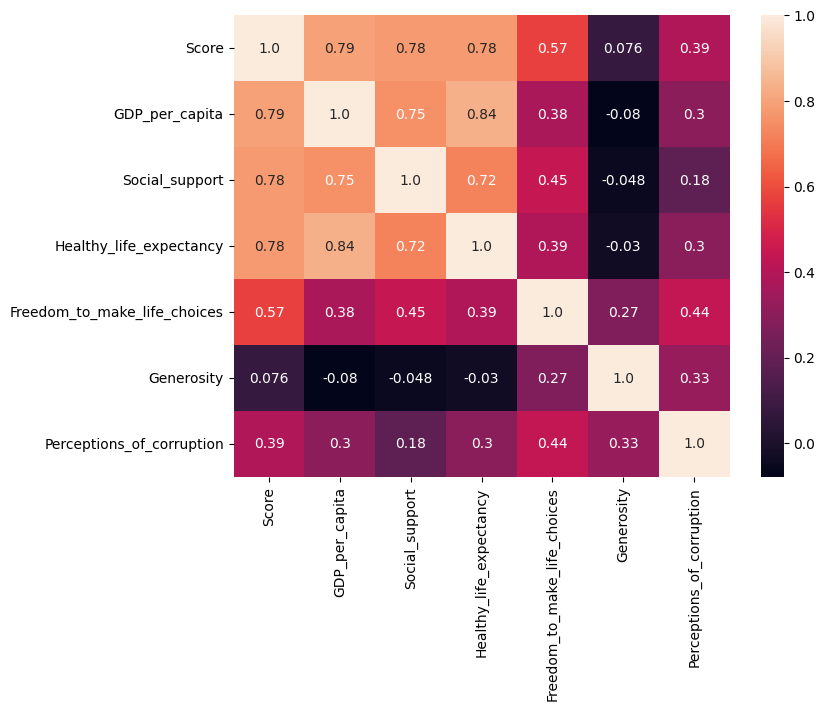

In [13]:
#Correlation map;
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df3.corr(), annot= True, fmt='.2', ax= ax)

In [14]:
#Selecting countries with higher than average happiness scores
df4 = df[df['Score']>df['Score'].mean()].head(30)
df4

,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


<Axes: xlabel='Country_or_region'>

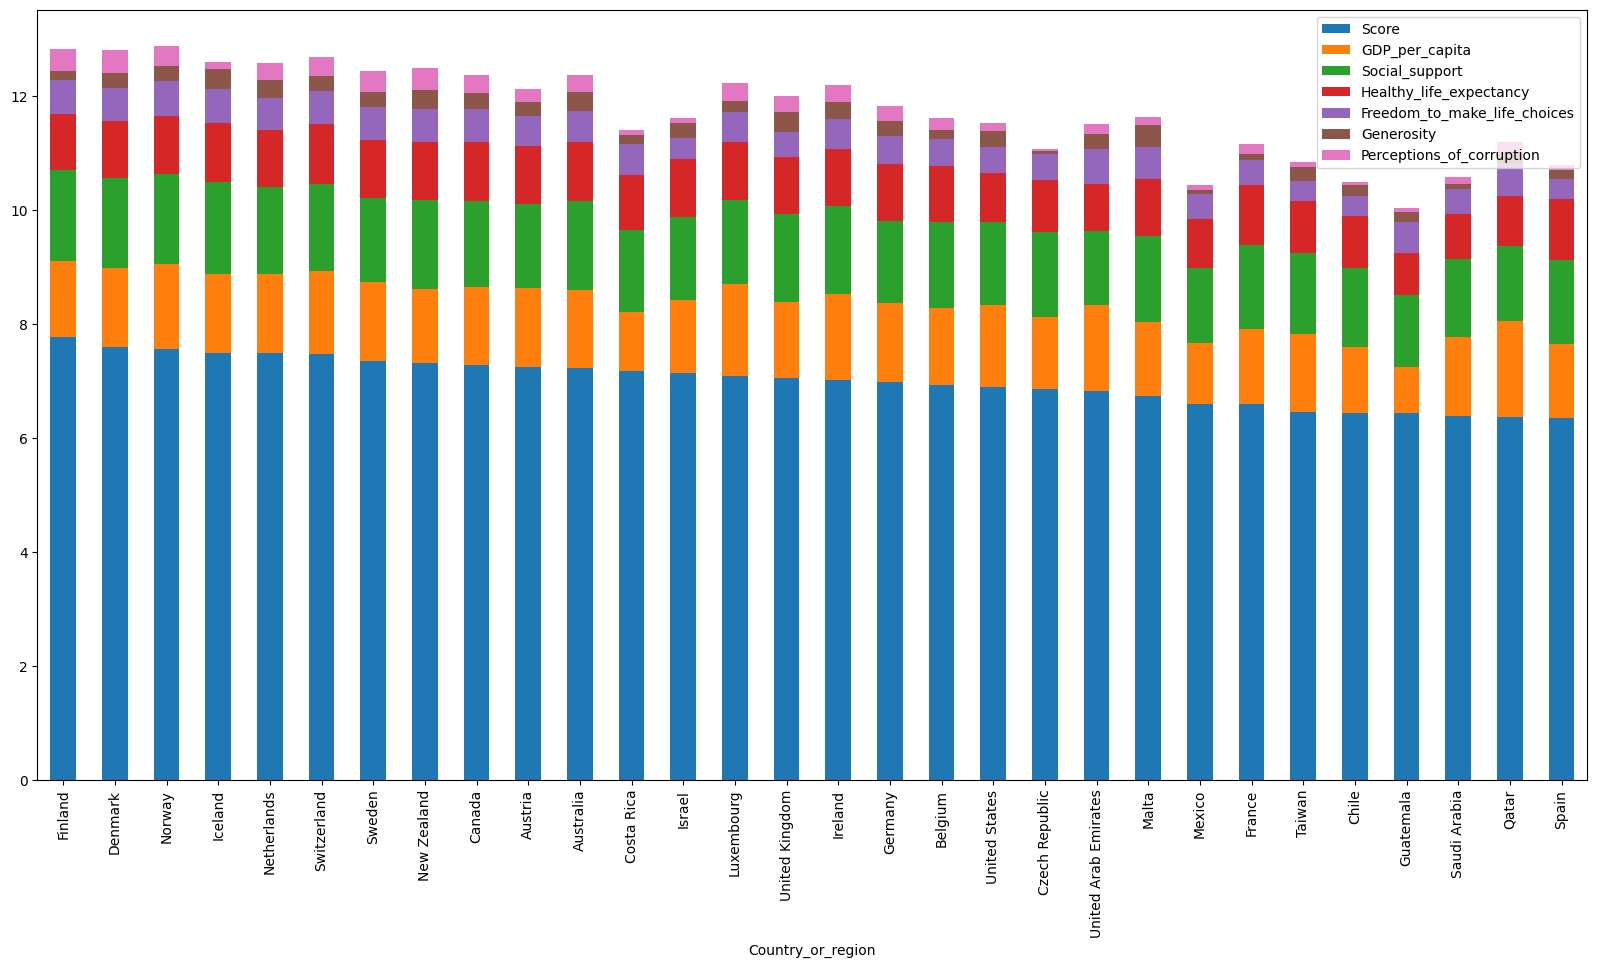

In [15]:
#Other parameters of countries with above-average happiness score
df4.plot(kind='bar', x = 'Country_or_region',stacked=True, figsize=(20,10))

In [16]:
df

,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


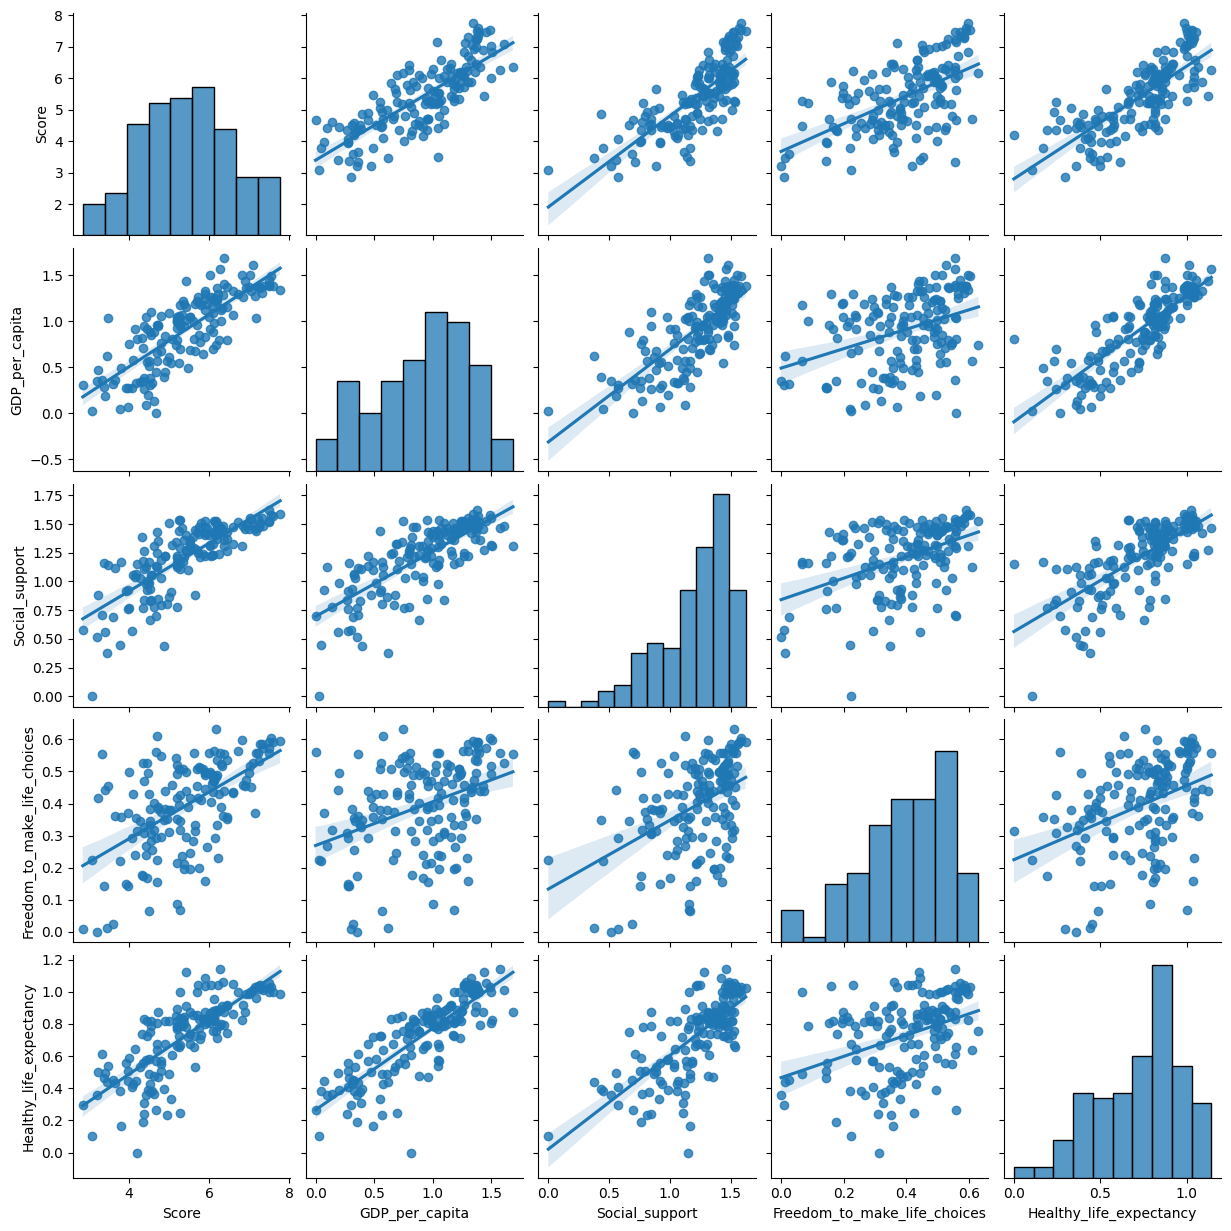

In [17]:
#Relationship of parameters with each other;
sns.pairplot(df[['Score', 'GDP_per_capita', 'Social_support', 
                 'Freedom_to_make_life_choices', 'Healthy_life_expectancy']], 
             kind='reg');

In [18]:
#Turkey values;
df5 = df[df['Country_or_region']=='Turkey']
df5

,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
78,Turkey,5.373,1.183,1.36,0.808,0.195,0.083,0.106
